In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

PALATTE = "Set1"

In [25]:

df = pd.read_csv("data/survey_responses.csv")

print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Career                                                    2958 non-null   object 
 1   Citizenship                                               2958 non-null   object 
 2   Nationality                                               2958 non-null   object 
 3   Year since Matriculation                                  2958 non-null   int64  
 4   Year of Study                                             2958 non-null   int64  
 5   Primary Programme                                         2958 non-null   object 
 6   Gender                                                    2958 non-null   object 
 7   Department                                                2958 non-null   object 
 8   Housing Type      

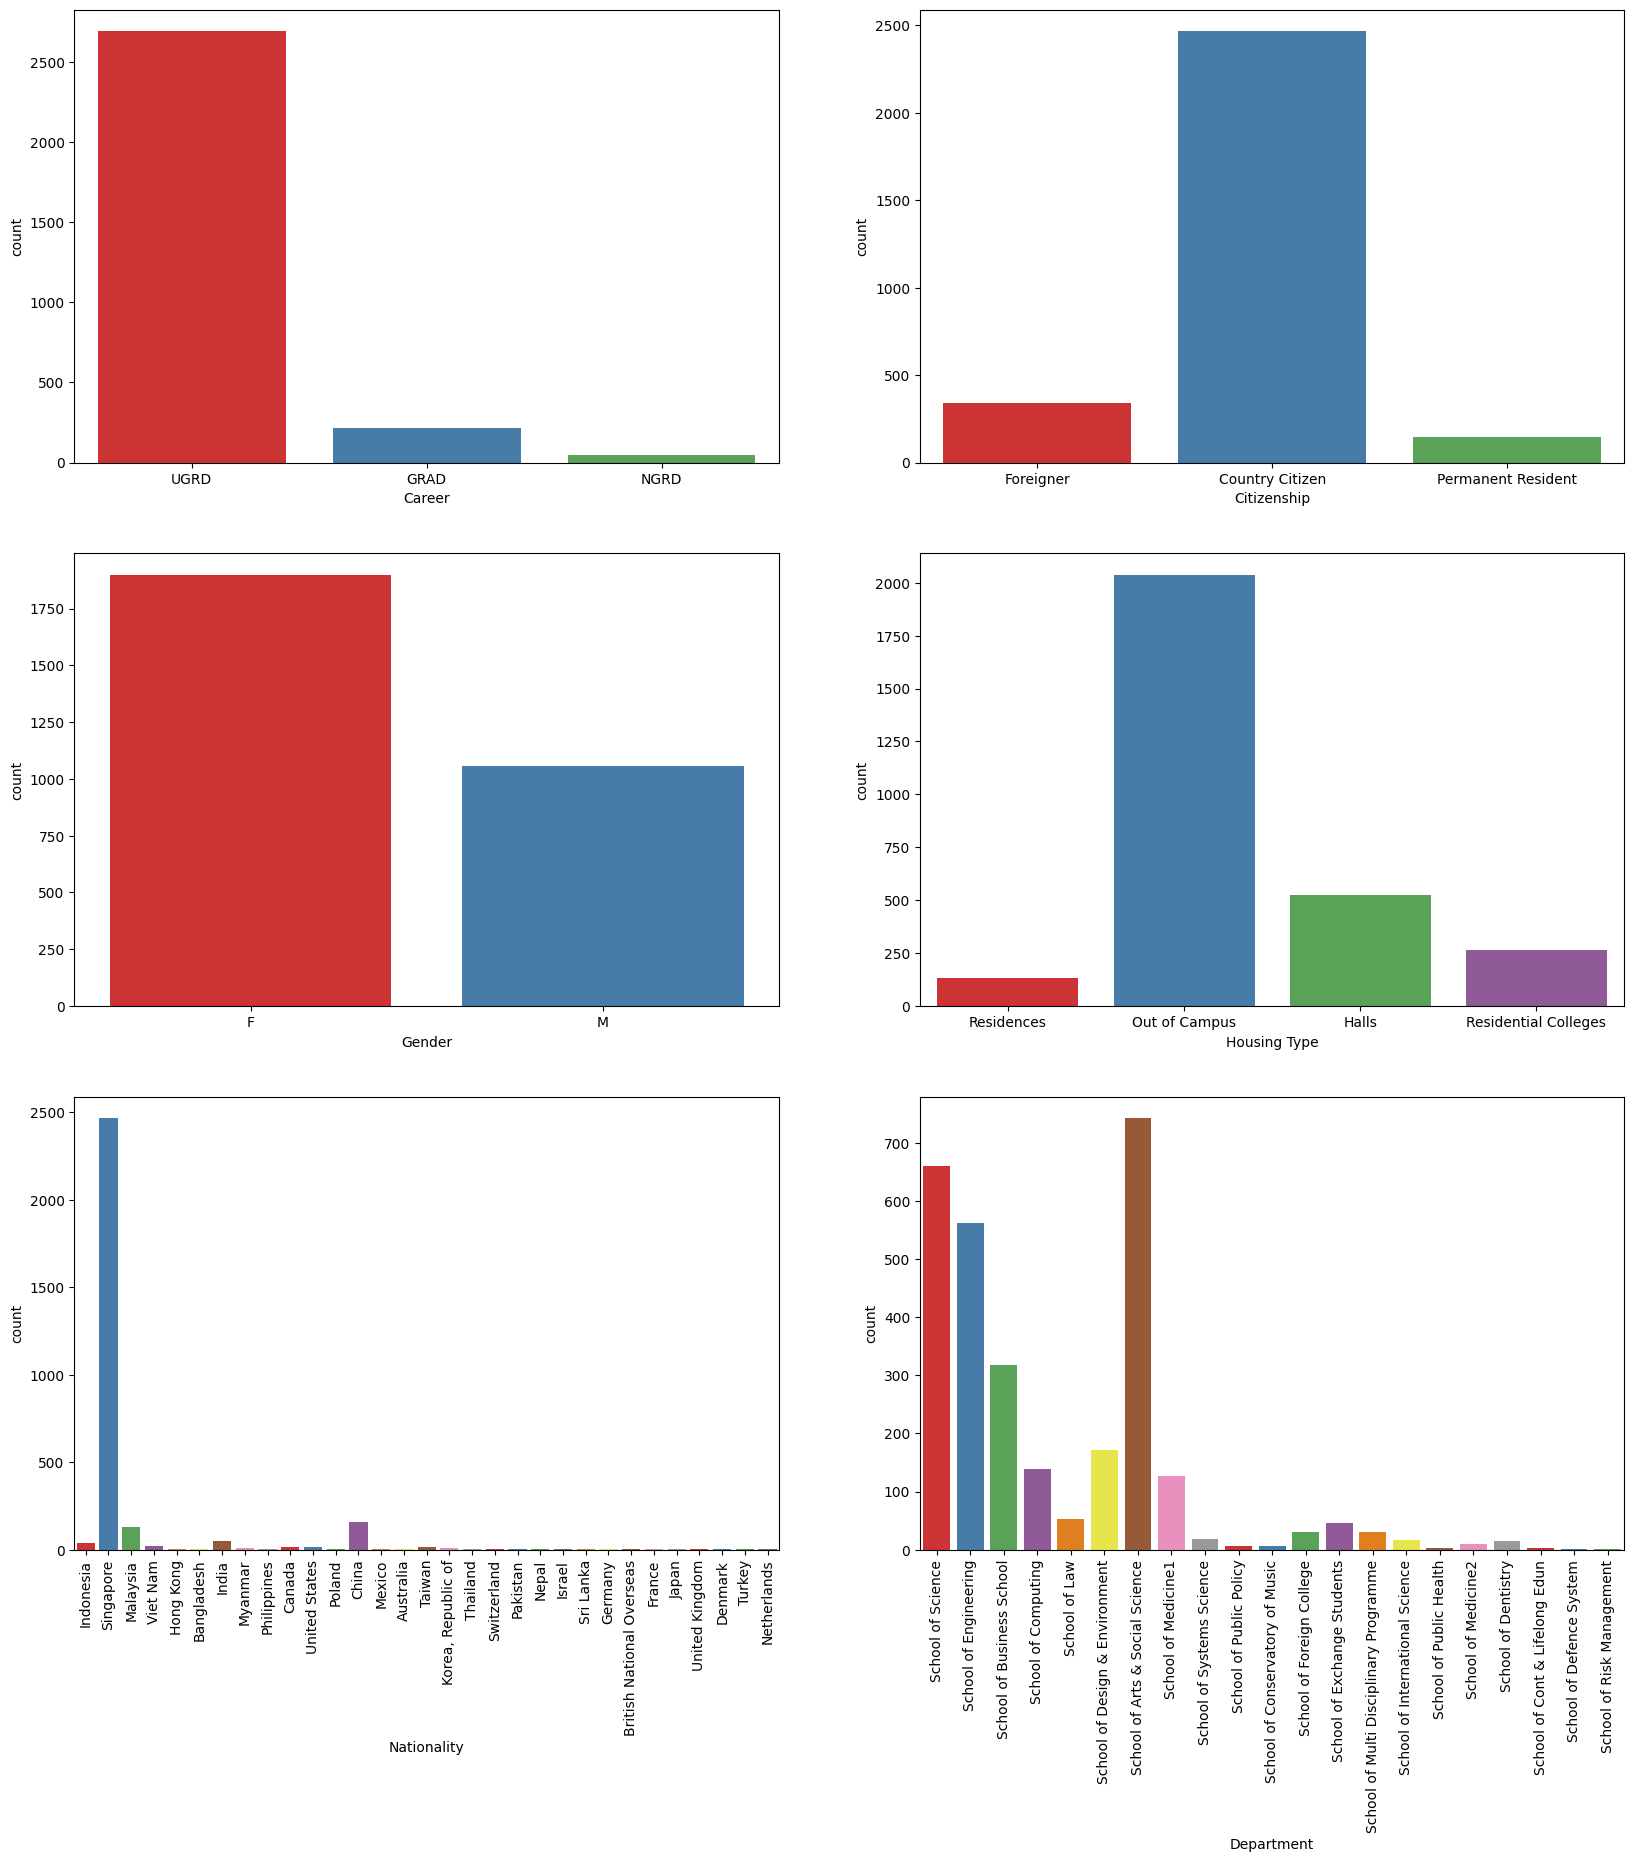

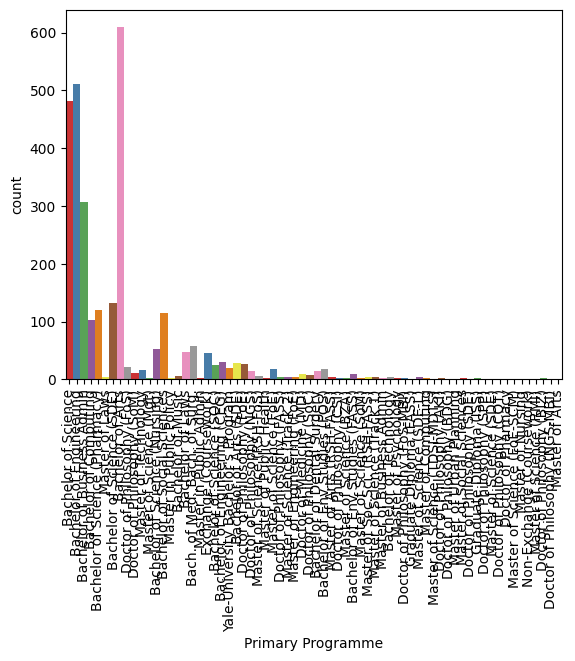

In [90]:
# Distributions of categorical features

fig, ax = plt.subplots(3,2, figsize=(20, 20))
sns.countplot(x ='Career', data = df, palette = PALATTE, ax=ax[0,0])
sns.countplot(x ='Citizenship', data = df, palette = PALATTE, ax=ax[0,1])
sns.countplot(x ='Gender', data = df, palette = PALATTE, ax=ax[1, 0])
sns.countplot(x ='Housing Type', data = df, palette = PALATTE, ax=ax[1, 1])

sns.countplot(x ='Nationality', data = df, palette = PALATTE, ax=ax[2, 0])
ax[2, 0].set_xticklabels(ax[2, 0].get_xticklabels(), rotation=90)

sns.countplot(x ='Department', data = df, palette = PALATTE, ax=ax[2, 1])
ax[2, 1].set_xticklabels(ax[2, 1].get_xticklabels(), rotation=90)


plt.show()

sns.countplot(x ='Primary Programme', data = df, palette = PALATTE, width=1)
plt.xticks(rotation=90)

plt.show()


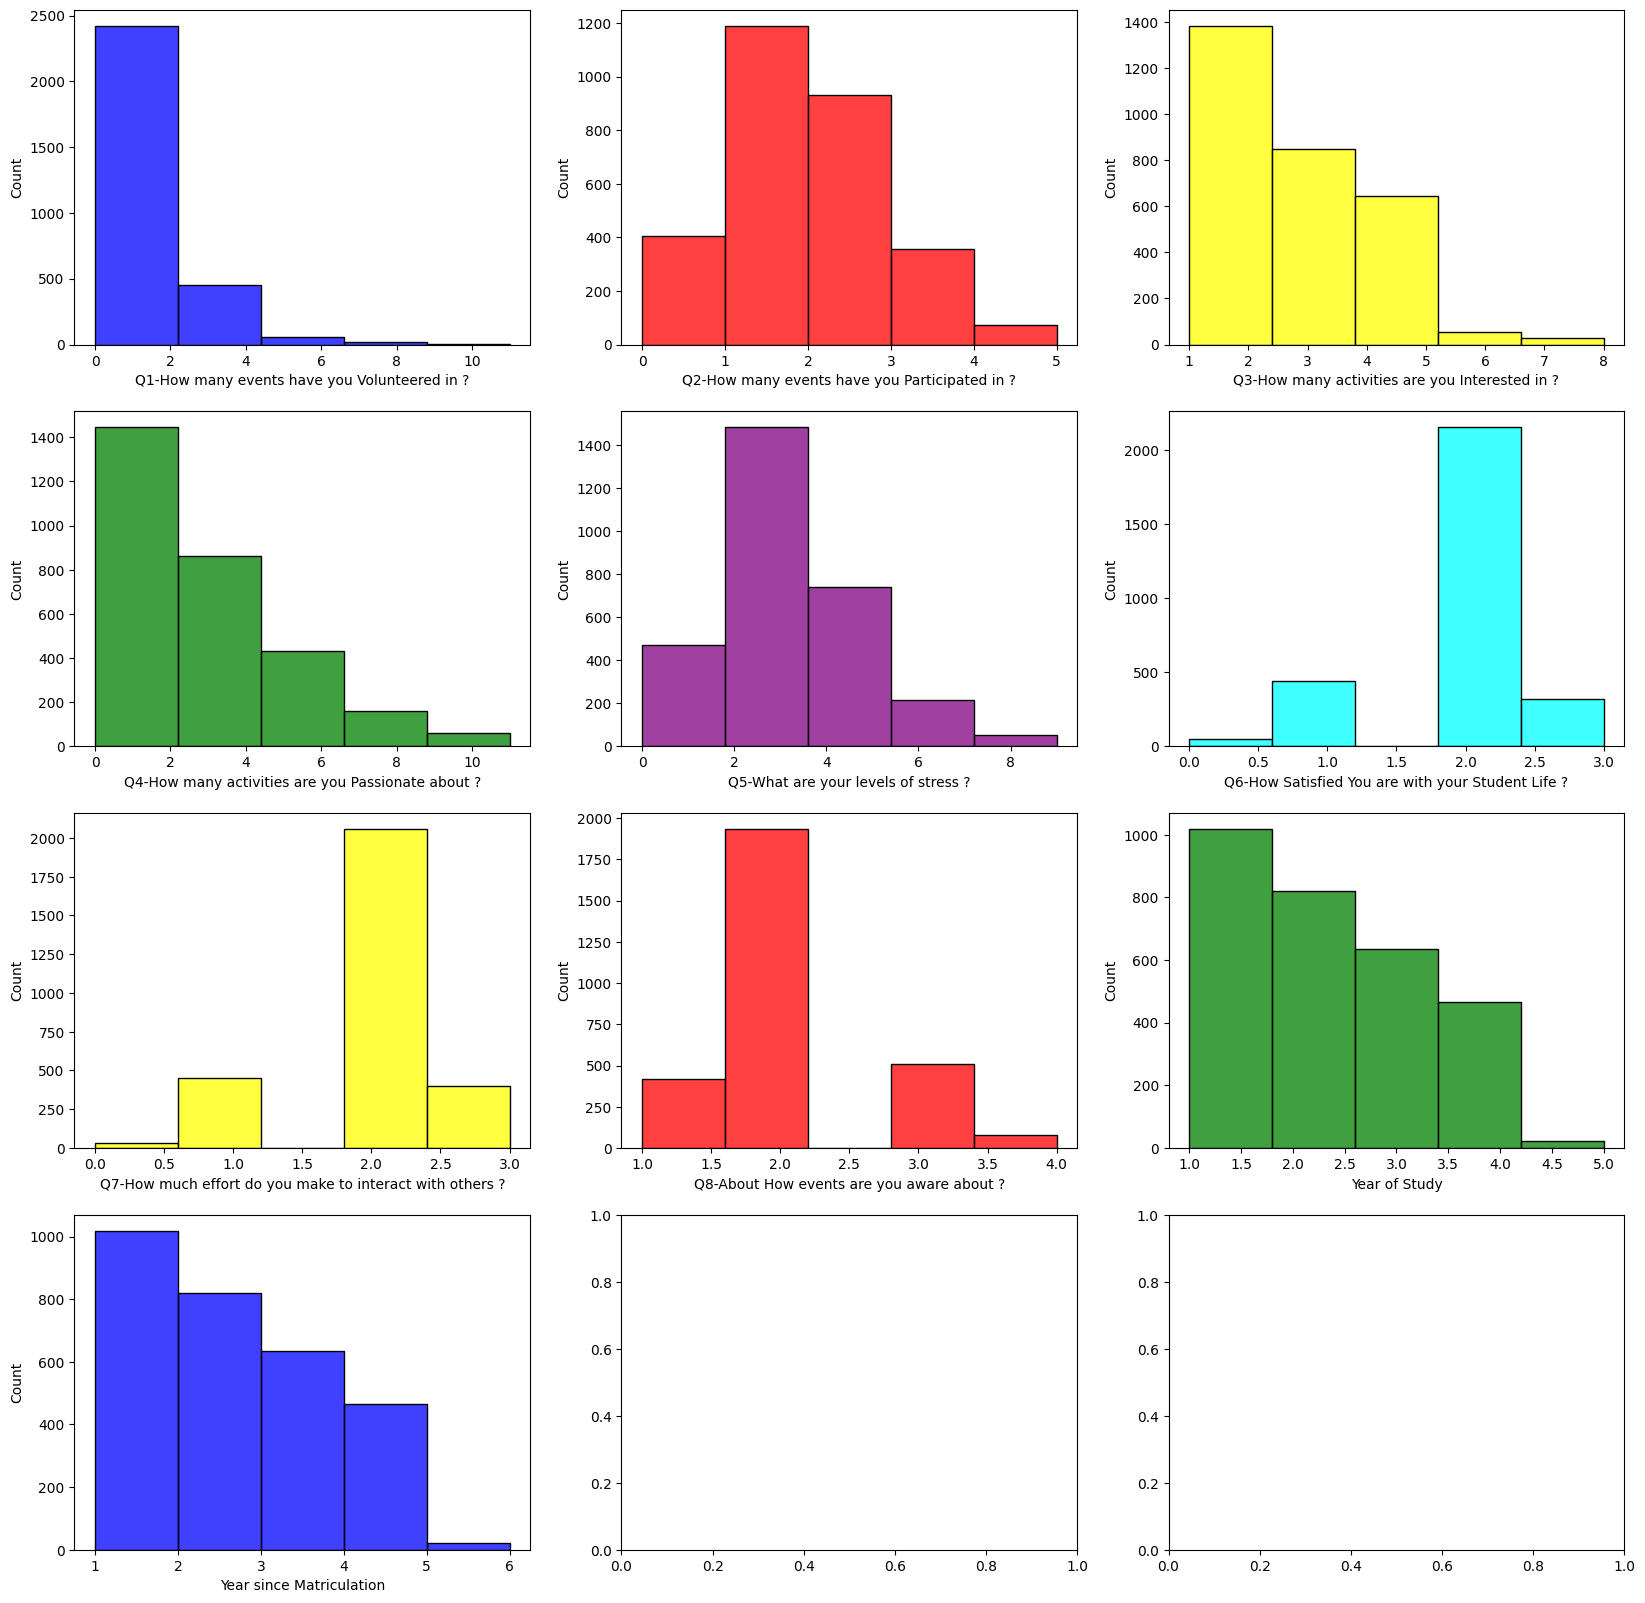

In [51]:
# Distributions of numerical features

fig, ax = plt.subplots(4,3, figsize=(20, 20))

sns.histplot(bins=5,color='blue', x ='Q1-How many events have you Volunteered in ?', data = df, ax=ax[0,0])
sns.histplot(bins=5,color='red', x ='Q2-How many events have you Participated in ?', data = df, ax=ax[0,1])
sns.histplot(bins=5,color='yellow', x ='Q3-How many activities are you Interested in ?', data = df, ax=ax[0, 2])
sns.histplot(bins=5,color='green', x ='Q4-How many activities are you Passionate about ?', data = df,  ax=ax[1, 0])
sns.histplot(bins=5,color='purple', x ='Q5-What are your levels of stress ?', data = df,  ax=ax[1, 1])
sns.histplot(bins=5,color='cyan', x ='Q6-How Satisfied You are with your Student Life ?', data = df, ax=ax[1, 2])
sns.histplot(bins=5,color='yellow', x ='Q7-How much effort do you make to interact with others ?', data = df, ax=ax[2, 0])
sns.histplot(bins=5,color='red', x ='Q8-About How events are you aware about ?', data = df, ax=ax[2, 1])
sns.histplot(bins=5,color='green', x ='Year of Study', data = df, ax=ax[2, 2])
sns.histplot(bins=5,color='blue', x ='Year since Matriculation', data = df, ax=ax[3, 0])

plt.show()


C:\Users\schae\AppData\Local\Temp\ipykernel_12108\132923921.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


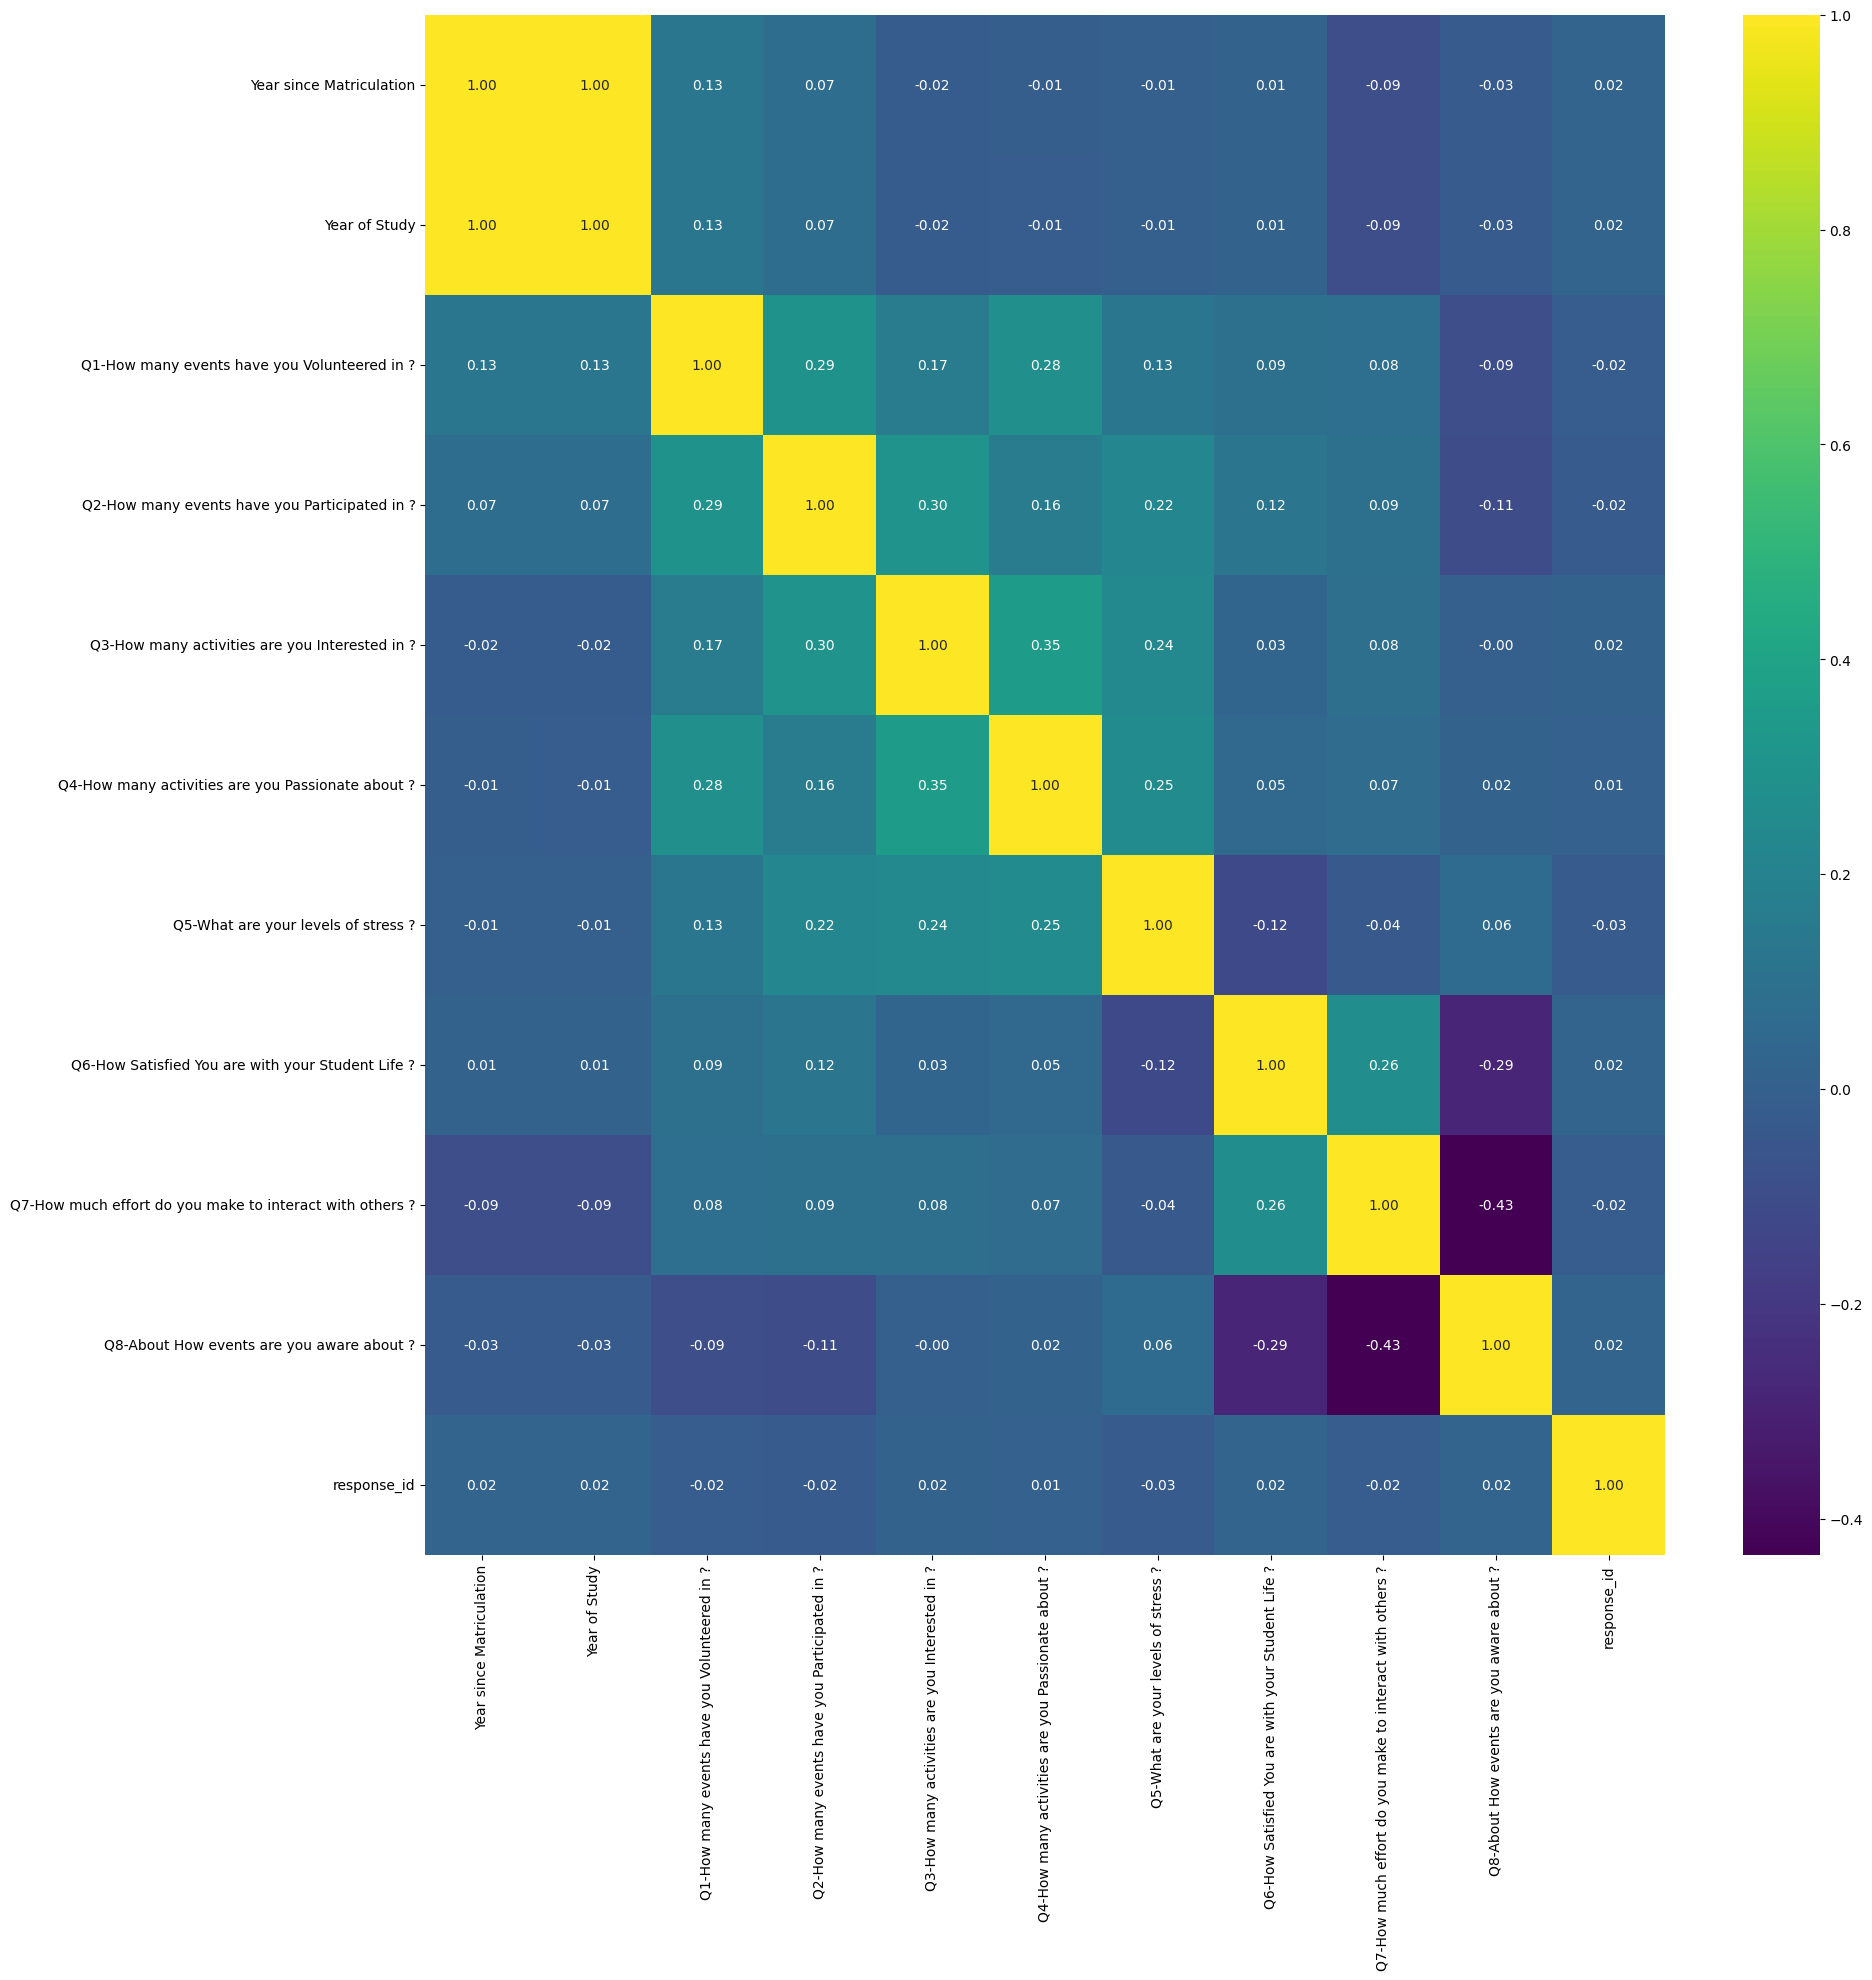

In [55]:
# Correlation Matrix

corr = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, annot=True, fmt='.2f', cmap="viridis", ax=ax)
plt.show()


In [95]:
# Analysis of Variance (ANOVA)

from scipy import stats

TARGET_COLUMN = "Q6-How Satisfied You are with your Student Life ?"

def anova(frame, features):

    anv = pd.DataFrame()
    anv['features'] = features
    pvals = []

    for feature in features:
        samples = []

        for unique_val in frame[feature].unique():
            boolean_mask = frame[feature] == unique_val

            sample = frame[boolean_mask][TARGET_COLUMN].values            
            samples.append(sample)

        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)

    anv['pval'] = pvals
    return anv.sort_values('pval')

anova_features = [
    "Citizenship",  # str
    "Nationality",  # str
    "Year since Matriculation",  # int
    "Year of Study",  # int
    "Primary Programme",  # str
    "Gender",  # str
    "Department",  # str
    "Housing Type",  # str
    "Q1-How many events have you Volunteered in ?",  # int
    "Q2-How many events have you Participated in ?",  # int
    "Q3-How many activities are you Interested in ?",  # int
    "Q4-How many activities are you Passionate about ?",  # int
    "Q5-What are your levels of stress ?",  # int
]

k = anova(df, anova_features)

print(k)

                                             features          pval
9       Q2-How many events have you Participated in ?  1.749015e-10
12                Q5-What are your levels of stress ?  1.359710e-09
7                                        Housing Type  5.311837e-08
1                                         Nationality  3.758018e-06
4                                   Primary Programme  6.847807e-06
6                                          Department  1.626146e-05
8        Q1-How many events have you Volunteered in ?  7.285420e-04
5                                              Gender  7.980470e-04
3                                       Year of Study  8.159889e-03
2                            Year since Matriculation  1.581324e-02
0                                         Citizenship  4.267535e-02
11  Q4-How many activities are you Passionate about ?  9.319456e-02
10     Q3-How many activities are you Interested in ?  7.387781e-01
